# The TensorFlow Dataset API

Source: https://www.tensorflow.org/guide/data

In this notebook, we'll see some examples of using the `tf.data.Dataset` API to build input pipelines.

In [1]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import os

import matplotlib.pyplot as plt

### Create Datasets from In-memory Tensors

The easiest way to create datasets is starting from in-memory data (Python lists, Numpy arrays, TF tensors, etc.)

In [2]:
dataset = tf.data.Dataset.from_tensor_slices([8, 3, 0, 8, 2, 1])

for d in dataset:
    print(d.numpy())

8
3
0
8
2
1


##### Iterate over datasets

We can also iteate on datasets using the Python `iter()` construct.

In [3]:
it = iter(dataset)
print(next(it).numpy())
print(next(it).numpy())

8
3


In [4]:
print(next(it).numpy())

0


In [5]:
print(next(it))

tf.Tensor(8, shape=(), dtype=int32)


##### Inspect the type of each element

We can inspect the type of each dataset element as follows. In this example, each element is a rank-1 tensor of length 10 and type `float32`.

In [6]:
randmat = tf.random.uniform([4, 10, 10])

In [7]:
print(randmat)

tf.Tensor(
[[[6.29670858e-01 4.96640563e-01 7.93827534e-01 7.21094728e-01
   2.51464009e-01 2.46715903e-01 6.52448177e-01 3.27775002e-01
   4.54808235e-01 5.16287565e-01]
  [3.04408908e-01 1.62420511e-01 6.77303314e-01 5.22068024e-01
   3.09735894e-01 5.89093566e-01 6.45209789e-01 4.47520733e-01
   3.69645119e-01 5.08854032e-01]
  [3.05658817e-01 4.88764524e-01 5.74512720e-01 4.14518595e-01
   1.91118717e-02 9.76248980e-02 9.66540813e-01 1.86642647e-01
   5.80831647e-01 1.00138187e-02]
  [8.90129566e-01 6.11931920e-01 3.56985331e-02 9.41984057e-01
   1.13669038e-01 5.72372198e-01 9.02679920e-01 8.30115795e-01
   2.64541507e-01 3.27087402e-01]
  [5.65407991e-01 5.95259905e-01 1.22643828e-01 9.72690701e-01
   8.76479387e-01 7.13168740e-01 7.43783832e-01 1.43917561e-01
   8.74769807e-01 2.92264104e-01]
  [6.50773764e-01 1.88569069e-01 9.48016644e-02 8.19424033e-01
   9.67992902e-01 9.84224677e-01 3.32454324e-01 8.37034225e-01
   2.22767711e-01 5.10342479e-01]
  [5.97027659e-01 8.93561840e

In [8]:
dataset1 = tf.data.Dataset.from_tensor_slices(randmat)

In [9]:
dataset1.element_spec

TensorSpec(shape=(10, 10), dtype=tf.float32, name=None)

In [10]:
print(next(iter(dataset1)))

tf.Tensor(
[[0.62967086 0.49664056 0.79382753 0.7210947  0.251464   0.2467159
  0.6524482  0.327775   0.45480824 0.51628757]
 [0.3044089  0.16242051 0.6773033  0.522068   0.3097359  0.58909357
  0.6452098  0.44752073 0.36964512 0.50885403]
 [0.30565882 0.48876452 0.5745127  0.4145186  0.01911187 0.0976249
  0.9665408  0.18664265 0.58083165 0.01001382]
 [0.89012957 0.6119319  0.03569853 0.94198406 0.11366904 0.5723722
  0.9026799  0.8301158  0.2645415  0.3270874 ]
 [0.565408   0.5952599  0.12264383 0.9726907  0.8764794  0.71316874
  0.74378383 0.14391756 0.8747698  0.2922641 ]
 [0.65077376 0.18856907 0.09480166 0.81942403 0.9679929  0.9842247
  0.33245432 0.8370342  0.22276771 0.5103425 ]
 [0.59702766 0.89356184 0.59567773 0.2899698  0.21416569 0.00437617
  0.45279896 0.4990176  0.7934383  0.25824666]
 [0.84395397 0.47389913 0.71918917 0.5257484  0.24503064 0.54700327
  0.07852888 0.22781909 0.10984564 0.47540128]
 [0.89817774 0.32888627 0.29212213 0.9321265  0.04670227 0.97514904
  0.5

In [11]:
len(dataset1)

4

In [15]:
dataset_xx = tf.data.Dataset.from_tensors([randmat, randmat])

In [17]:
print(len(dataset_xx))
dataset_xx.element_spec

1


TensorSpec(shape=(2, 4, 10, 10), dtype=tf.float32, name=None)

##### Datasets with multiple components

We can create datasets in which each element has multiple components. Here, the first element is a scalar float, and the second element is a rank-1 tensor of 10 integers.

In [19]:
dataset = tf.data.Dataset.from_tensor_slices((
    tf.random.uniform([4]),
    tf.random.uniform([4, 10], maxval=10, dtype=tf.int32)
))

print(dataset.element_spec)
print(len(dataset))

for d in dataset:
    print(d[0].numpy(), d[1].numpy())


(TensorSpec(shape=(), dtype=tf.float32, name=None), TensorSpec(shape=(10,), dtype=tf.int32, name=None))
4
0.36231768 [9 7 9 0 0 1 5 4 4 8]
0.62052596 [6 7 3 9 6 7 6 4 0 7]
0.017804384 [6 3 6 4 2 5 8 5 1 5]
0.25211096 [8 0 9 9 8 6 6 6 6 6]


Alternatively, components can be specified with a name using a dictionary.

In [22]:
dataset = tf.data.Dataset.from_tensor_slices(
   {'output': tf.random.uniform([4]),
    'input': tf.random.uniform([4, 10], maxval=10, dtype=tf.int32)})

print(dataset.element_spec)
print(len(dataset))
for d in dataset:
    print('output:', d['output'].numpy(), 'input:', d['input'].numpy())

{'output': TensorSpec(shape=(), dtype=tf.float32, name=None), 'input': TensorSpec(shape=(10,), dtype=tf.int32, name=None)}
4
output: 0.21241677 input: [2 9 1 1 5 4 1 2 2 0]
output: 0.22786355 input: [7 6 6 6 4 5 7 3 6 6]
output: 0.6046711 input: [1 9 8 8 0 8 4 5 0 3]
output: 0.060297847 input: [6 1 1 3 7 0 9 7 4 7]


##### A more realistic example

Let's use `keras.datasets` to retrieve MNIST and convert it to a `tf.data.Dataset`. Train and test are two tuples of (images, labels). So, they can be directly passed to `from_tensor_slices()`. As shown by `element_spec` images are 28x28, while labels are scalar.

In [23]:
train, test = keras.datasets.fashion_mnist.load_data()

In [26]:
print(len(train))
print(train[0].shape)
print(train[1].shape)

2
(60000, 28, 28)
(60000,)


In [27]:
train_ds = tf.data.Dataset.from_tensor_slices(train)
test_ds = tf.data.Dataset.from_tensor_slices(test)

print(len(train_ds))
print(len(test_ds))
print(train_ds.element_spec)

60000
10000
(TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))


### Create datasets from text files

Let's see an example of one of the many alternative data sources that we can use to build datasets. The `keras.utils.get_file` is a convenient function to fetch files from URLs. Here, we'll use it to download three text files corresponding to three different translations of the Illiad. Files are downloaded under the usual hidden keras folder.



In [28]:
directory_url = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/'
file_names = ['cowper.txt', 'derby.txt', 'butler.txt']

file_paths = [
    tf.keras.utils.get_file(file_name, directory_url + file_name)
    for file_name in file_names
]

print(file_paths)

['/Users/jah/.keras/datasets/cowper.txt', '/Users/jah/.keras/datasets/derby.txt', '/Users/jah/.keras/datasets/butler.txt']


The `TextLineDataset` class can digest turn multiple files into a dataset, in which each line is an element. 

The `take(<N>)` method fetches the first `<N>` elements from the dataset.

In [29]:
dataset = tf.data.TextLineDataset(file_paths)

In [31]:
for line in dataset.take(5):
    print(line.numpy())

b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;"
b'His wrath pernicious, who ten thousand woes'
b"Caused to Achaia's host, sent many a soul"
b'Illustrious into Ades premature,'
b'And Heroes gave (so stood the will of Jove)'


In [35]:
it = iter(dataset)

In [46]:
print(next(it).numpy())

b"Latona's son and Jove's. For he, incensed"


### Create Datasets from CSV Files

As a final example of source, let's digest a CSV file with the help of Pandas. For this, we'll use the [Titanic](https://www.tensorflow.org/datasets/catalog/titanic) dataset, which is used to predict the survival of Titanic passengers based on features such as age, sex, ticket class, etc.

We start by reading the CSV in pandas.

In [47]:
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")
df = pd.read_csv(titanic_file, index_col=None)
df.head()


,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


We can then convert this to a TF Dataset by passing through an intermediate conversion to a Python dictionary, so to preserve column names

In [48]:
titanic_slices = tf.data.Dataset.from_tensor_slices(dict(df))

for feature_batch in titanic_slices.take(4):
    for key, value in feature_batch.items():
        print("{}: {}, ".format(key, value), end='')
    print("\n")

survived: 0, sex: b'male', age: 22.0, n_siblings_spouses: 1, parch: 0, fare: 7.25, class: b'Third', deck: b'unknown', embark_town: b'Southampton', alone: b'n', 

survived: 1, sex: b'female', age: 38.0, n_siblings_spouses: 1, parch: 0, fare: 71.2833, class: b'First', deck: b'C', embark_town: b'Cherbourg', alone: b'n', 

survived: 1, sex: b'female', age: 26.0, n_siblings_spouses: 0, parch: 0, fare: 7.925, class: b'Third', deck: b'unknown', embark_town: b'Southampton', alone: b'y', 

survived: 1, sex: b'female', age: 35.0, n_siblings_spouses: 1, parch: 0, fare: 53.1, class: b'First', deck: b'C', embark_town: b'Southampton', alone: b'n', 



### Transforming Datasets

Let's see some dataset transformations. Let's use MNIST for this part.

In [49]:
train, test = keras.datasets.fashion_mnist.load_data()

##### Zipping

Let's assume that, for any reason, we didn't directly generate a dataset using the (images, labels) tuple, and instead we have separate datasets for inputs and outputs (ordered in the same way).

In [50]:
train_x, train_y = train

train_x = tf.data.Dataset.from_tensor_slices(train_x)
train_y = tf.data.Dataset.from_tensor_slices(train_y)

print(train_x.element_spec)
print(train_y.element_spec)

TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None)
TensorSpec(shape=(), dtype=tf.uint8, name=None)


We can go back to the more convenient single Dataset using the `zip()` transformation.

In [51]:
train = tf.data.Dataset.zip((train_x, train_y))
print(train.element_spec)

# let's save this version of the dataset for later
train_orig = train

(TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))


##### Batching

Right now, each element contains a single image and label:

In [52]:
for elem in train.take(4):
    print(elem[0].numpy().shape, elem[1].numpy())

(28, 28) 9
(28, 28) 0
(28, 28) 0
(28, 28) 3


We can create batches of 32 images with:

In [53]:
train = train.batch(32)

In [54]:
for elem in train.take(4):
    print(elem[0].numpy().shape, elem[1].numpy().shape)

(32, 28, 28) (32,)
(32, 28, 28) (32,)
(32, 28, 28) (32,)
(32, 28, 28) (32,)


##### Shuffling

We can also shuffle the dataset. Shuffling takes a buffer size.

In [55]:
train = train_orig.shuffle(100).batch(32)

The order of batching and shuffling matters. To see this, we can add an index to each element:

In [56]:
counter = tf.data.experimental.Counter()
train_idx = tf.data.Dataset.zip((counter, train_x, train_y))
print(train_idx.element_spec)

(TensorSpec(shape=(), dtype=tf.int64, name=None), TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))


Shuffle before batching. Elements in the first batch cannot have indexes larger than 131:

In [57]:
train_sb = train_idx.shuffle(100).batch(32)

for elem in train_sb.take(4):
    print(elem[0])

tf.Tensor(
[ 68  38  23  67  78  99   3   9  80  86 106  40  13  94  18  97 105 102
  81 112  83  39  70  34  17  45 120  31 115 123   4  85], shape=(32,), dtype=int64)
tf.Tensor(
[117  41 122 128  57  48   8  77  64 138  74  71 142 132 116 121 114  61
  22  53  36  98 100 154  62  91  42  92  33  46  76 153], shape=(32,), dtype=int64)
tf.Tensor(
[ 10 141 111 124   5  14 148 140 144  37  19 107 171 101 104  21 149 129
   7 172  73 113 163 160 134  26 146  51  32 152 170 166], shape=(32,), dtype=int64)
tf.Tensor(
[159 164  69 110 191 199 167 179  50 108 133  72  29  84  95 145   2 207
  20 210   0  15   1  96  66 139  11 218 109  35 205 193], shape=(32,), dtype=int64)


Batch before shuffling:

In [58]:
train_sb = train_idx.batch(32).shuffle(100)

for elem in train_sb.take(4):
    print(elem[0])

tf.Tensor(
[2240 2241 2242 2243 2244 2245 2246 2247 2248 2249 2250 2251 2252 2253
 2254 2255 2256 2257 2258 2259 2260 2261 2262 2263 2264 2265 2266 2267
 2268 2269 2270 2271], shape=(32,), dtype=int64)
tf.Tensor(
[2400 2401 2402 2403 2404 2405 2406 2407 2408 2409 2410 2411 2412 2413
 2414 2415 2416 2417 2418 2419 2420 2421 2422 2423 2424 2425 2426 2427
 2428 2429 2430 2431], shape=(32,), dtype=int64)
tf.Tensor(
[512 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527 528 529
 530 531 532 533 534 535 536 537 538 539 540 541 542 543], shape=(32,), dtype=int64)
tf.Tensor(
[448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465
 466 467 468 469 470 471 472 473 474 475 476 477 478 479], shape=(32,), dtype=int64)


### More advanced preprocessing

Let's see one example of more advanced preprocessing using the map function. Let's normalize the MNIST dataset to 0:1.

In [59]:
def normalize(X, y):
    X_norm = tf.cast(X, tf.float32) / 255.0
    return X_norm, y

train = train_orig.map(normalize).shuffle(100).batch(4)

In [60]:
print(next(iter(train))[0][0,10:20,10:20])
print(next(iter(train_orig))[0][10:20,10:20])

tf.Tensor(
[[0.0627451  0.8352941  0.95686275 1.         0.85490197 0.8
  0.85490197 0.56078434 0.         0.00392157]
 [0.29803923 0.9098039  0.92156863 0.91764706 0.85490197 0.827451
  0.8627451  0.8745098  0.         0.        ]
 [0.6313726  0.88235295 0.85490197 0.85490197 0.8627451  0.80784315
  0.81960785 0.8352941  0.1254902  0.        ]
 [0.8392157  0.85490197 0.87058824 0.8666667  0.85490197 0.8235294
  0.8117647  0.8509804  0.34901962 0.        ]
 [0.8117647  0.827451   0.88235295 0.85490197 0.85490197 0.81960785
  0.8156863  0.8509804  0.64705884 0.        ]
 [0.8666667  0.80784315 0.88235295 0.85490197 0.85490197 0.8235294
  0.8117647  0.84313726 0.79607844 0.        ]
 [0.8901961  0.8        0.8784314  0.87058824 0.84705883 0.827451
  0.8235294  0.8235294  0.76862746 0.        ]
 [0.9098039  0.79607844 0.88235295 0.87058824 0.84705883 0.827451
  0.8392157  0.8156863  0.8        0.        ]
 [0.92156863 0.79607844 0.88235295 0.87058824 0.8509804  0.8235294
  0.8392157  0.81

##### Reading images with map()

We can also use the map function to convert a dataset that contains filenames to one that contains images.

In [61]:
flowers_root = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)
print(flowers_root + '/*/*')

list_ds = tf.data.Dataset.list_files(str(flowers_root + '/*/*'))

for elem in list_ds.take(5):
     print(elem.numpy())

/Users/jah/.keras/datasets/flower_photos/*/*
b'/Users/jah/.keras/datasets/flower_photos/sunflowers/20148493928_9f75a99783.jpg'
b'/Users/jah/.keras/datasets/flower_photos/dandelion/14058811536_f29cd7bd58_n.jpg'
b'/Users/jah/.keras/datasets/flower_photos/roses/2225411981_6638c3e988.jpg'
b'/Users/jah/.keras/datasets/flower_photos/roses/16552686350_db8db55cd2.jpg'
b'/Users/jah/.keras/datasets/flower_photos/roses/16691277899_9433f39155_n.jpg'


Let's write a function to read one image from the filename, and also determine the label based on the path:

In [62]:
def parse_image(filename):
    parts = tf.strings.split(filename, os.sep)

    # the folder name is the label
    label = parts[-2]

    # read and resize the image
    image = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [128, 128])
    return image, label

We can test this function on a single image first:

b'roses'


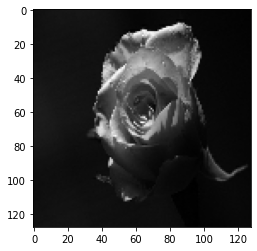

In [64]:
image, label = parse_image(next(iter(list_ds)))
plt.imshow(image)
print(label.numpy())

Then, we can use map to apply it to the entire dataset:

In [65]:
image_ds = list_ds.map(parse_image)

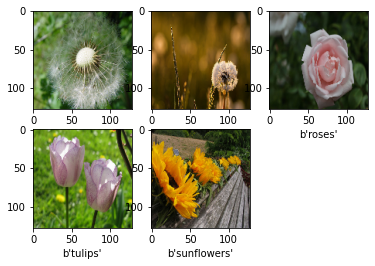

In [66]:
fig = plt.figure()

for i, elem in enumerate(image_ds.take(5)):
    ax = fig.add_subplot(2,3,i+1)
    ax.imshow(elem[0])
    ax.set_xlabel(elem[1].numpy())
    ax.grid(False)

### Optimizing performance

We can improve the performance of input pipelines by:
- Prefetching
- Caching
- Applying map in parallel
- Etc.

This is particularly useful for datasets that process files stored on disk (not in-memory data).